Machine learning is about uncertainity. 
- Prediction of uncertainity
- Quantification of uncertainity

Probability is the mathematical field concerned with reasoning under uncertainity. Bayesian : 
- Assigning degree of belief to non repetable events
- Subjectivity : Start off with different beliefs

Probabilities are theoretical quantities that underly the DGP. Statistics are empirical quantities.

data -> estimators -> estimates -> probabilities
- consistency : estimates converging to corresponding probabilities. 

In [3]:
%matplotlib inline 
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [56]:
# Experiment
tosses_ = 1000
heads = sum([random.randint(0, 1) > 0.5 for _ in range(tosses_)])
tails = tosses_ - heads
print(f"Number of heads: {heads}, Number of tails: {tails}")

# Simulation - Multinomial
fairProbs = torch.tensor([0.5, 0.5])
Multinomial(tosses_, fairProbs).sample() / tosses_  # Probability

Number of heads: 546, Number of tails: 454


tensor([0.4770, 0.5230])

Averages of the repeated events as n -> $\infty$ will converge to true probability. So in the short run probability is always jittery.

$N(\mu, \frac{\sigma^2}{n})$ ; Increasing n, the error rates go down by $\frac{1}{\sqrt(n)}$ as noted in variance decreasing. 

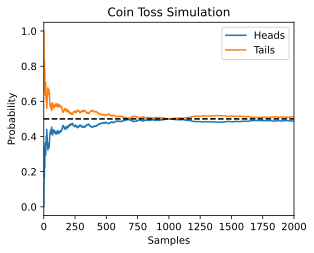

In [80]:
counts = Multinomial(1, fairProbs).sample((10000,))
cumsum = counts.cumsum(dim=0) # Total heads till now
probs = cumsum / cumsum.sum(dim=1, keepdim=True) # Probs of heads increasing.
probs = probs.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(probs[:, 0], label='Heads')
d2l.plt.plot(probs[:, 1], label='Tails')
d2l.plt.axhline(0.5, color='black', linestyle='--')
d2l.plt.gca().set_xlabel("Samples")
d2l.plt.gca().set_ylabel("Probability")
d2l.plt.legend()
d2l.plt.xlim([0, 2000])
d2l.plt.title("Coin Toss Simulation")
d2l.plt.show()

#### Formal

Kolmogorovs axioms of probability. 

Function that maps events into real values : ${P: \mathcal{A} \subseteq \mathcal{S} \rightarrow [0,1]}$
- $P(\mathcal{A}) \geq 0$
- $P(\mathcal{S}) = 1$
- $P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$

Random variables are mappings from underlying sample space to set of values. ( Numerical in nature ), every value taken by the random variable corresponds to the subset of underlying sample space. 

Multiple random variables : Joint Probability distributions <br>
$P(A=a, B=b) \leq P(A=a) \textrm{ and } P(A=a, B=b) \leq P(B = b),$

Bayes theorem : 
$P(A \mid B) = \frac{P(B \mid A) P(A)}{\sum_a P(B \mid A=a) P(A = a)}.$

Marginalization : 

$\sum_a P(B \mid A=a) P(A=a) = \sum_a P(B, A=a) = P(B).$

Independence : $P(B\mid A) = P(B)$ Event B doesn't depend on the occurence of event A
- $P(B\mid A) = \frac{P(A,B)}{P(A)} = P(A) * P(B\mid A) = P(A) * P(B) = P(A,B)$

#### Expectation 

$ E_{x \sim P}[f(x)] = \sum_x f(x) P(x) \textrm{ and } E_{x \sim P}[f(x)] = \int f(x) p(x) \;dx $

$\textrm{Var}_{x \sim P}[f(x)] = E_{x \sim P}[f^2(x)] - E_{x \sim P}[f(x)]^2.$

Covariances : $\boldsymbol{\Sigma} \stackrel{\textrm{def}}{=} \textrm{Cov}_{\mathbf{x} \sim P}[\mathbf{x}] = E_{\mathbf{x} \sim P}\left[(\mathbf{x} - \boldsymbol{\mu}) (\mathbf{x} - \boldsymbol{\mu})^\top\right].$


#### Types of uncertainities : 
- Aleatoric : Due to randomness unaccounted for by observed variables
- Epistemic : Uncertainity over a model's parameter

$\frac{1}{\sqrt(n)}$ -> Increasing the n = 10 to 1000, will decrease the uncertainity by 10 fold but another 1000 samples will decrease $\frac{1}{\sqrt(2)} = 1.41$

In [ ]:
## Documentation
print(dir(torch.distributions))
help(torch.ones)
torch.ones?? # To see the source code

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :attr:`

#### Documentation Functions

1. dir() : To know about which functions and classes are in the module
2. help(function_name) -> Docstring about the function

Tips : Better engineer
- Study source code of the libraries : High quality implementation
- Go through the official documentation
